<a href="https://colab.research.google.com/github/Imtiajur/VRP_Simplified/blob/main/CVRP_Simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''we will do a capacited VRP here
route 3
1 deport
cover all the demand point'''


'we will do a capacited VRP here\nroute 3\n1 deport\ncover all the demand point'

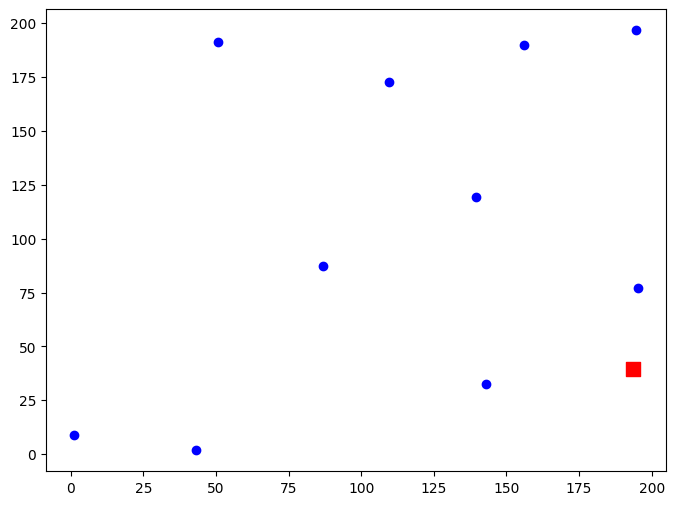

In [2]:
import numpy as np
import matplotlib.pyplot as plt
rnd=np.random
rnd.seed(4)
n=10 #number of clients/demand
xc=rnd.rand(n+1)*200
yc=rnd.rand(n+1)*200
plt.figure(figsize=(8, 6))
plt.scatter(xc[1:], yc[1:], c='blue', label='Clients')
plt.scatter(xc[0], yc[0], c='red', marker='s', s=100, label='Depot')
plt.show()

In [3]:
N = []
for i in range(1, n + 1):
    N.append(i)
print (N)
V=[0]+N
A=[(i,j) for i in V for j in V if i!=j ]
#print (A)
N = []
for i in range(1, n + 1):
    N.append(i)
print (N)
V=[0]+N
A=[(i,j) for i in V for j in V if i!=j ]
#print (A)
#print (V)
print (len(A))
import numpy as np
C = {(i, j): round(float(np.hypot(xc[i] - xc[j], yc[i] - yc[j])), 2) for i, j in A}
Q=20
q={i:rnd.randint(1,10) for i in N}
q

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
110


{1: 8, 2: 1, 3: 9, 4: 4, 5: 2, 6: 1, 7: 4, 8: 3, 9: 4, 10: 3}

In [4]:
!pip install gurobipy
from gurobipy import Model,GRB,quicksum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 47.8 MB/s eta 0:00:00


In [5]:
model=Model("CVRP")

Restricted license - for non-production use only - expires 2026-11-23


∑j∈V,j=i​xij​=1 for all i∈Ni \in N
i∈N - Each customer must have exactly one outgoing arc
∑i∈V,i≠jxij=1\sum_{i \in V, i \neq j} x_{ij} = 1

∑i∈V,i=j​xij​=1 for all j∈Nj \in N
j∈N - Each customer must have exactly one incoming arc

In [6]:
x=model.addVars(A,vtype=GRB.BINARY)
u=model.addVars(N,vtype=GRB.CONTINUOUS)
model.ModelSense=GRB.MINIMIZE
model.setObjective(quicksum(x[i,j]*C[i,j]for i,j in A))
model.addConstrs(quicksum(x[i,j]for j in V if i!=j)==1 for i in N)
model.addConstrs(quicksum(x[i,j]for i in V if i!=j)==1 for j in N)
model.addConstrs((x[i,j]==1) >> (u[1]+q[1]==u[j])for i,j in A if i!=0 and j!=0)
model.addConstrs(u[i]>= q[i] for i in N)
model.addConstrs (u[i]<=Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>}

In [7]:
model.optimize()

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0xbbc6c2a0
Model has 90 simple general constraints
  90 INDICATOR
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [8e+00, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve removed 3 rows and 29 columns
Presolve time: 0.01s
Presolved: 37 rows, 91 columns, 360 nonzeros
Variable types: 10 continuous, 81 integer (81 binary)
Found heuristic solution: objective 2657.9200000
Found heuristic solution: objective 2431.8600000
Found heuristic solution: objective 2399.9300000

Root relaxation: objective 7.434200e+02, 39 it

In [8]:
active_arc=[a for a in A if x[a].x>0.99]
active_arc

[(0, 1),
 (1, 8),
 (2, 10),
 (3, 6),
 (4, 9),
 (5, 7),
 (6, 0),
 (7, 5),
 (8, 4),
 (9, 3),
 (10, 2)]

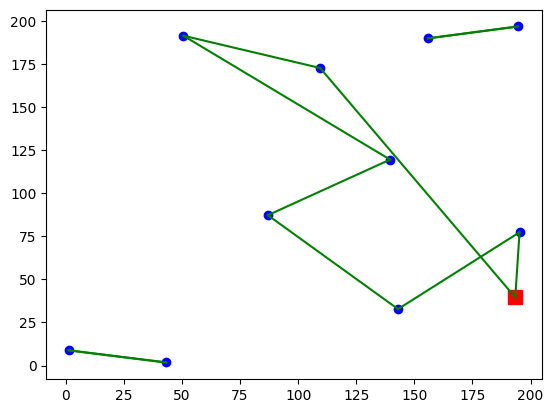

In [9]:
plt.plot(xc[0],yc[0],color='r',marker='s',markersize=10)
plt.scatter(xc[1:],yc[1:],c='b')
for i,j in active_arc:
  plt.plot([xc[i],xc[j]],[yc[i],yc[j]],color='g')

Vehicle Routing Problem Model Explanation
1. Problem Definition
The Capacitated Vehicle Routing Problem (CVRP) involves finding optimal routes for multiple vehicles to serve a set of customers while respecting vehicle capacity constraints. Each customer has a specific demand, and the goal is to minimize the total distance traveled.

x[i, j] = 1 if a vehicle travels directly from location i to location j
Load Variables (u[i]):
Represents the cumulative load of the vehicle after visiting customer i.
Objective Function TO MINIMIZE THE DISTANCE
Minimize
∑C[i,j]⋅x[i,j] (i,j)∈A  
Constraints
Each customer is visited exactly once
Depot Constraints:

Departure from Depot:

The number of vehicles leaving the depot equals the total number of vehicles.
∑𝑗∈N𝑥[0,𝑗]=
Number of Vehicle
j∈N∑x[0,j]=Number of Vehicles
Return to Depot:
The number of vehicles returning to the depot equals the total number of vehicles.
∑𝑖∈𝑁𝑥[𝑖,0]=Number of Vehicles
i∈N∑x[i,0]=Number of Vehicles
Where:
0 represents the depot

2. Mathematical Sets and Parameters

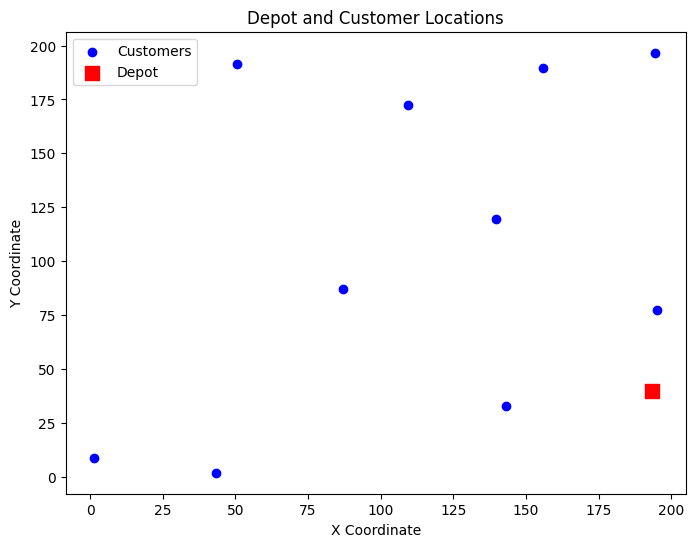

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 132 rows, 120 columns and 510 nonzeros
Model fingerprint: 0x666f4f53
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e+01, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 20 rows and 0 columns
Presolve time: 0.00s
Presolved: 112 rows, 120 columns, 986 nonzeros
Variable types: 10 continuous, 110 integer (110 binary)
Found heuristic solution: objective 1679.7400000
Found heuristic solution: objective 1514.5500000
Found heuristic solution: objective 1471.4600000

Root relaxation: objective 6.650895e+02, 33 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Ex

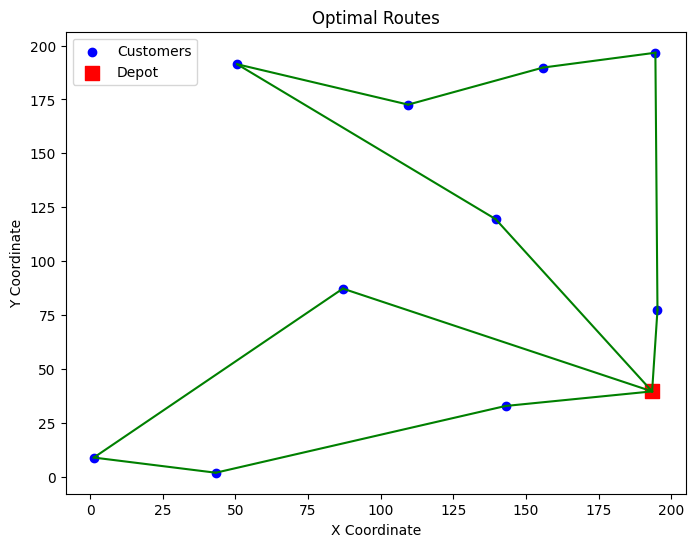

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum

# Set random seed for reproducibility
np.random.seed(4)

# Parameters
n = 10  # Number of customers
Q = 20  # Vehicle capacity
num_vehicles = 2  # Number of vehicles

# Generate coordinates for depot and customers
xc = np.random.rand(n + 1) * 200
yc = np.random.rand(n + 1) * 200

# Plot the depot and customers
plt.figure(figsize=(8, 6))
plt.scatter(xc[1:], yc[1:], c='blue', label='Customers')
plt.scatter(xc[0], yc[0], c='red', marker='s', s=100, label='Depot')
plt.title('Depot and Customer Locations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

# Sets
N = list(range(1, n + 1))  # Customers
V = [0] + N  # All nodes including depot
A = [(i, j) for i in V for j in V if i != j]  # Arcs

# Distance matrix
C = {(i, j): round(float(np.hypot(xc[i] - xc[j], yc[i] - yc[j])), 2) for i, j in A}

# Customer demands
q = {i: np.random.randint(1, 10) for i in N}

# Create model
model = Model("CVRP")

# Decision variables
x = model.addVars(A, vtype=GRB.BINARY, name='x')
u = model.addVars(N, vtype=GRB.CONTINUOUS, name='u')

# Objective: minimize total distance
model.modelSense = GRB.MINIMIZE
model.setObjective(quicksum(C[i, j] * x[i, j] for i, j in A))

# Constraints

# Each customer is visited exactly once
model.addConstrs(quicksum(x[i, j] for j in V if i != j) == 1 for i in N)
model.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)

# Vehicles depart from and return to the depot
model.addConstr(quicksum(x[0, j] for j in N) == num_vehicles)
model.addConstr(quicksum(x[i, 0] for i in N) == num_vehicles)

# Subtour elimination (MTZ constraints)
model.addConstrs(u[i] - u[j] + Q * x[i, j] <= Q - q[j]
                 for i, j in A if i != 0 and j != 0)

# Load constraints
model.addConstrs(u[i] >= q[i] for i in N)
model.addConstrs(u[i] <= Q for i in N)

# Optimize model
model.optimize()

# Extract solution
active_arcs = [(i, j) for i, j in A if x[i, j].X > 0.5]

# Plot solution
plt.figure(figsize=(8, 6))
plt.scatter(xc[1:], yc[1:], c='blue', label='Customers')
plt.scatter(xc[0], yc[0], c='red', marker='s', s=100, label='Depot')
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='green')
plt.title('Optimal Routes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()
